# Apartment for Rent Classified – Machine Learning Project

## Integrantes do Grupo

- Gabriel Cunha de Araujo (2204029)
- Gabriel Zaniqueli (2205156)
- Kelvin Pimenta Dias (2205385)
- Lucas Ferreira Balduino (2201210)
- Lucas Marujo Amadeu (2108723)
- Nicolas Rossetto Samblas (2305916)
Renan Martins Rossi (2304805)

---

**Dataset:** [Apartment for Rent Classified - UCI Machine Learning Repository]


## 1. Introdução

### O que queremos alcançar

Neste projeto, vamos criar um modelo de Machine Learning que consiga identificar quando um anúncio de apartamento para aluguel é verdadeiro ou falso. A ideia é construir uma ferramenta que ajude a detectar fraudes e anúncios enganosos automaticamente.

### Que tipo de problema estamos resolvendo?

Estamos trabalhando com um **problema de classificação binária** – basicamente, queremos ensinar o computador a separar os anúncios em dois grupos:
- **Classe 0**: Anúncios legítimos (aqueles que são verdadeiros)
- **Classe 1**: Anúncios fraudulentos (os que tentam enganar as pessoas)

Escolhemos a classificação binária porque cada anúncio precisa ser categorizado em apenas uma dessas duas opções. Vamos treinar diferentes algoritmos de Machine Learning para que eles aprendam a reconhecer os padrões que diferenciam anúncios confiáveis dos suspeitos.

### Por que isso é importante?

Cada vez mais pessoas buscam apartamentos pela internet, e infelizmente isso também atraiu golpistas. Os anúncios falsos causam vários problemas:
- Pessoas que estão procurando um lugar para morar acabam sendo enganadas
- Muita gente perde dinheiro com esses golpes
- As plataformas de classificados perdem credibilidade
- O mercado imobiliário online fica com má reputação

Com um sistema inteligente de detecção de fraudes, as plataformas podem:
- Oferecer mais segurança para quem usa o site
- Garantir que os anúncios publicados sejam de qualidade
- Economizar tempo e dinheiro com moderação manual
- Reconquistar a confiança dos usuários

### Como vamos fazer isso

O trabalho está dividido em seis etapas principais:

1. **Conhecendo os dados**: Vamos carregar o dataset e fazer uma primeira exploração para entender o que temos em mãos
2. **Analisando os números**: Faremos uma análise estatística detalhada com gráficos e visualizações que ajudem a enxergar padrões
3. **Preparando tudo**: Limpeza e organização dos dados, deixando-os prontos para os modelos
4. **Criando os modelos**: Treinaremos diferentes algoritmos de classificação e veremos qual funciona melhor
5. **Colocando em prática**: Desenvolveremos um sistema simples que possa classificar novos anúncios
6. **Conclusões**: Resumiremos o que descobrimos e daremos recomendações para o futuro


## 2. Carregamento e Entendimento do Dataset


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Bibliotecas importadas com sucesso!")


✓ Bibliotecas importadas com sucesso!


In [4]:
# Carregamento do dataset
# O arquivo está disponível localmente
# Usando encoding='latin-1' e sep=';' pois o arquivo é separado por ponto e vírgula
df = pd.read_csv('apartments_for_rent_classified_100K.csv.xls', encoding='latin-1', sep=';')

print(f"Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas")


Dataset carregado com sucesso!
Dimensões: 99492 linhas e 22 colunas


### 2.1 Visualização Inicial dos Dados


In [5]:
# Exibir as primeiras linhas do dataset
print("=" * 80)
print("PRIMEIRAS 10 LINHAS DO DATASET")
print("=" * 80)
df.head(10)


PRIMEIRAS 10 LINHAS DO DATASET


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,NaN,1395.0,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
5,5668639368,housing/rent/apartment,Two BR 7801 Marble NE,"This unit is located at 7801 Marble NE, Albuqu...",NaN,1.5,2.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,"$1,250",Monthly,965,7801 Marble NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
6,5668638765,housing/rent/apartment,Two BR 5 Salt Marsh Quay Apartment H,This unit is located at five Salt Marsh Quay A...,NaN,2.0,2.0,USD,No,Thumbnail,NaN,1600.0,"$1,600",Monthly,1120,5 Salt Marsh Quay Apartment H,Hampton,VA,37.0451,-76.3664,RentLingo,1577360261
7,5668638578,housing/rent/apartment,Two BR 11280 W. 20th Ave.,"This unit is located at 11280 W. 20th Ave., La...",NaN,2.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1300.0,"$1,300",Monthly,947,11280 W 20th Avenue,Lakewood,CO,39.6894,-105.1119,RentLingo,1577360247
8,5668638476,housing/rent/apartment,Two BR 1427 Lewis Street,"This unit is located at 1427 Lewis Street, Cha...",NaN,1.0,2.0,USD,No,Thumbnail,Dogs,795.0,$795,Monthly,600,1427 Lewis St,Charleston,WV,38.3454,-81.6219,RentLingo,1577360239
9,5668638122,housing/rent/apartment,Two BR 10201 Remmet Avenue,"This unit is located at 10201 Remmet Avenue, C...",NaN,2.0,2.0,USD,No,Thumbnail,NaN,2150.0,"$2,150",Monthly,1005,10201 Remmet Ave,Chatsworth,CA,34.2551,-118.5976,RentLingo,1577360204


In [6]:
# Informações sobre o dataset
print("=" * 80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 80)
df.info()


INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190

In [7]:
# Estatísticas descritivas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
df.describe(include='all').T


ESTATÍSTICAS DESCRITIVAS


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,99492.0,NaN,NaN,NaN,5358321136.751809,184740358.964435,5121046168.0,5197949712.25,5508672978.5,5509007173.25,5669438542.0
category,99492,7,housing/rent/apartment,99431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,99492,58503,Apartment in great location,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,99492,94503,"When searching for a pet-friendly One-, Two- a...",43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amenities,83448,9827,Parking,6188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,99429.0,NaN,NaN,NaN,1.445323,0.547021,1.0,1.0,1.0,2.0,9.0
bedrooms,99368.0,NaN,NaN,NaN,1.728212,0.7492,0.0,1.0,2.0,2.0,9.0
currency,99492,1,USD,99492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fee,99492,2,No,99291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_photo,99492,3,Yes,55974,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 Descrição das Features (Colunas)

O dataset contém as seguintes colunas:

#### Features (Variáveis Preditoras):

1. **id**: Identificador único do anúncio
2. **category**: Categoria do imóvel
3. **title**: Título do anúncio
4. **body**: Descrição completa do anúncio
5. **amenities**: Comodidades oferecidas (ex: piscina, academia, etc.)
6. **bathrooms**: Número de banheiros
7. **bedrooms**: Número de quartos
8. **currency**: Moeda utilizada no preço
9. **fee**: Taxa adicional
10. **has_photo**: Indica se o anúncio possui foto (yes/no)
11. **pets_allowed**: Indica se permite animais de estimação
12. **price**: Preço do aluguel
13. **price_display**: Formato de exibição do preço
14. **price_type**: Tipo de preço (mensal, semanal, etc.)
15. **square_feet**: Área do apartamento em pés quadrados
16. **address**: Endereço do imóvel
17. **cityname**: Nome da cidade
18. **state**: Estado
19. **latitude**: Coordenada de latitude
20. **longitude**: Coordenada de longitude
21. **source**: Fonte do anúncio
22. **time**: Data/hora de publicação

#### Target (Variável Alvo):

23. **fraudulent**: **Indica se o anúncio é fraudulento (1) ou legítimo (0)** - Esta é nossa variável alvo!


### 2.3 Análise de Qualidade dos Dados


In [8]:
# Verificação de valores nulos
print("=" * 80)
print("VALORES NULOS POR COLUNA")
print("=" * 80)
null_counts = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({
    'Coluna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Percentual (%)': null_percentage.values
})
null_df = null_df[null_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
print(null_df.to_string(index=False))

if len(null_df) == 0:
    print("\n✓ Não há valores nulos no dataset!")
    
print(f"\n\nTotal de valores nulos no dataset: {df.isnull().sum().sum()}")


VALORES NULOS POR COLUNA
       Coluna  Valores Nulos  Percentual (%)
      address          91549       92.016444
 pets_allowed          60424       60.732521
    amenities          16044       16.125920
        state            302        0.303542
     cityname            302        0.303542
     bedrooms            124        0.124633
    bathrooms             63        0.063322
     latitude             25        0.025128
    longitude             25        0.025128
price_display              1        0.001005
        price              1        0.001005


Total de valores nulos no dataset: 168860


In [9]:
# Verificação de registros duplicados
print("=" * 80)
print("VERIFICAÇÃO DE DUPLICADOS")
print("=" * 80)
duplicados = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")
if duplicados > 0:
    print(f"Percentual de duplicados: {(duplicados/len(df))*100:.2f}%")
else:
    print("✓ Não há registros duplicados!")


VERIFICAÇÃO DE DUPLICADOS
Total de registros duplicados: 84
Percentual de duplicados: 0.08%


In [10]:
# Verificação da distribuição da variável target
print("=" * 80)
print("DISTRIBUIÇÃO DA VARIÁVEL TARGET (fraudulent)")
print("=" * 80)

if 'fraudulent' in df.columns:
    print(df['fraudulent'].value_counts())
    print("\nPercentual:")
    print(df['fraudulent'].value_counts(normalize=True) * 100)
    
    # Visualização
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    df['fraudulent'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
    ax[0].set_title('Distribuição de Anúncios (Contagem)')
    ax[0].set_xlabel('Fraudulent (0=Legítimo, 1=Falso)')
    ax[0].set_ylabel('Contagem')
    ax[0].set_xticklabels(['Legítimo', 'Fraudulento'], rotation=0)
    
    df['fraudulent'].value_counts(normalize=True).plot(kind='pie', ax=ax[1], 
                                                         autopct='%1.1f%%', 
                                                         colors=['green', 'red'],
                                                         labels=['Legítimo', 'Fraudulento'])
    ax[1].set_title('Distribuição de Anúncios (Percentual)')
    ax[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Coluna 'fraudulent' não encontrada. Precisaremos criar a variável target.")


DISTRIBUIÇÃO DA VARIÁVEL TARGET (fraudulent)
⚠ Coluna 'fraudulent' não encontrada. Precisaremos criar a variável target.


### Tratamento de Dados


In [11]:
# Criação de uma cópia para tratamento
df_clean = df.copy()

print("=" * 80)
print("TRATAMENTO DE DADOS")
print("=" * 80)

# Tratamento de valores nulos em colunas numéricas importantes
if 'bathrooms' in df_clean.columns and df_clean['bathrooms'].isnull().sum() > 0:
    df_clean['bathrooms'].fillna(df_clean['bathrooms'].median(), inplace=True)
    print("✓ Valores nulos em 'bathrooms' preenchidos com a mediana")

if 'bedrooms' in df_clean.columns and df_clean['bedrooms'].isnull().sum() > 0:
    df_clean['bedrooms'].fillna(df_clean['bedrooms'].median(), inplace=True)
    print("✓ Valores nulos em 'bedrooms' preenchidos com a mediana")

if 'square_feet' in df_clean.columns and df_clean['square_feet'].isnull().sum() > 0:
    df_clean['square_feet'].fillna(df_clean['square_feet'].median(), inplace=True)
    print("✓ Valores nulos em 'square_feet' preenchidos com a mediana")

if 'price' in df_clean.columns and df_clean['price'].isnull().sum() > 0:
    df_clean['price'].fillna(df_clean['price'].median(), inplace=True)
    print("✓ Valores nulos em 'price' preenchidos com a mediana")

# Tratamento de valores nulos em colunas categóricas
colunas_categoricas = df_clean.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"✓ Valores nulos em '{col}' preenchidos com 'Unknown'")

# Remoção de duplicados (se houver)
antes = len(df_clean)
df_clean.drop_duplicates(inplace=True)
depois = len(df_clean)
if antes > depois:
    print(f"✓ {antes - depois} registros duplicados removidos")
else:
    print("✓ Nenhum registro duplicado para remover")

print(f"\n✓ Dataset limpo! Dimensões finais: {df_clean.shape[0]} linhas e {df_clean.shape[1]} colunas")


TRATAMENTO DE DADOS
✓ Valores nulos em 'bathrooms' preenchidos com a mediana
✓ Valores nulos em 'bedrooms' preenchidos com a mediana
✓ Valores nulos em 'price' preenchidos com a mediana
✓ Valores nulos em 'amenities' preenchidos com 'Unknown'
✓ Valores nulos em 'pets_allowed' preenchidos com 'Unknown'
✓ Valores nulos em 'price_display' preenchidos com 'Unknown'
✓ Valores nulos em 'address' preenchidos com 'Unknown'
✓ Valores nulos em 'cityname' preenchidos com 'Unknown'
✓ Valores nulos em 'state' preenchidos com 'Unknown'
✓ 84 registros duplicados removidos

✓ Dataset limpo! Dimensões finais: 99408 linhas e 22 colunas


## 3. Análise Estatística e Diagnóstico dos Dados


### 3.1 Estatísticas Descritivas Detalhadas


In [12]:
# Seleção de colunas numéricas importantes para análise
colunas_numericas = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']
colunas_disponiveis = [col for col in colunas_numericas if col in df_clean.columns]

if len(colunas_disponiveis) > 0:
    df_numeric = df_clean[colunas_disponiveis].copy()
    
    # Cálculo de estatísticas detalhadas
    stats = pd.DataFrame()
    
    for col in colunas_disponiveis:
        if df_numeric[col].dtype in ['int64', 'float64']:
            stats[col] = {
                'Média': df_numeric[col].mean(),
                'Mediana': df_numeric[col].median(),
                'Moda': df_numeric[col].mode()[0] if len(df_numeric[col].mode()) > 0 else np.nan,
                'Desvio Padrão': df_numeric[col].std(),
                'Variância': df_numeric[col].var(),
                'Erro Padrão': df_numeric[col].std() / np.sqrt(len(df_numeric[col])),
                'Mínimo': df_numeric[col].min(),
                'Q1 (25%)': df_numeric[col].quantile(0.25),
                'Q2 (50%)': df_numeric[col].quantile(0.50),
                'Q3 (75%)': df_numeric[col].quantile(0.75),
                'Máximo': df_numeric[col].max(),
                'IQR': df_numeric[col].quantile(0.75) - df_numeric[col].quantile(0.25),
                'Amplitude': df_numeric[col].max() - df_numeric[col].min()
            }
    
    print("=" * 80)
    print("ESTATÍSTICAS DESCRITIVAS COMPLETAS")
    print("=" * 80)
    print(stats.T.to_string())
else:
    print("⚠ Nenhuma coluna numérica disponível para análise")


ESTATÍSTICAS DESCRITIVAS COMPLETAS
                   Média    Mediana      Moda  Desvio Padrão      Variância  Erro Padrão    Mínimo   Q1 (25%)   Q2 (50%)   Q3 (75%)      Máximo       IQR   Amplitude
bathrooms       1.445004     1.0000     1.000       0.546985       0.299193     0.001735    1.0000     1.0000     1.0000     2.0000      9.0000    1.0000      8.0000
bedrooms        1.728503     2.0000     2.000       0.748867       0.560801     0.002375    0.0000     1.0000     2.0000     2.0000      9.0000    1.0000      9.0000
price        1527.074622  1350.0000  1350.000     904.368529  817882.435593     2.868367  100.0000  1013.7500  1350.0000  1795.0000  52500.0000  781.2500  52400.0000
square_feet   956.442047   900.0000  1000.000     417.691525  174466.210127     1.324784  101.0000   729.0000   900.0000  1115.0000  50000.0000  386.0000  49899.0000
latitude       36.947563    37.2258    42.328       4.600332      21.163056     0.014591   19.5738    33.7465    37.2258    39.9533    

### 3.2 Visualizações: Histogramas


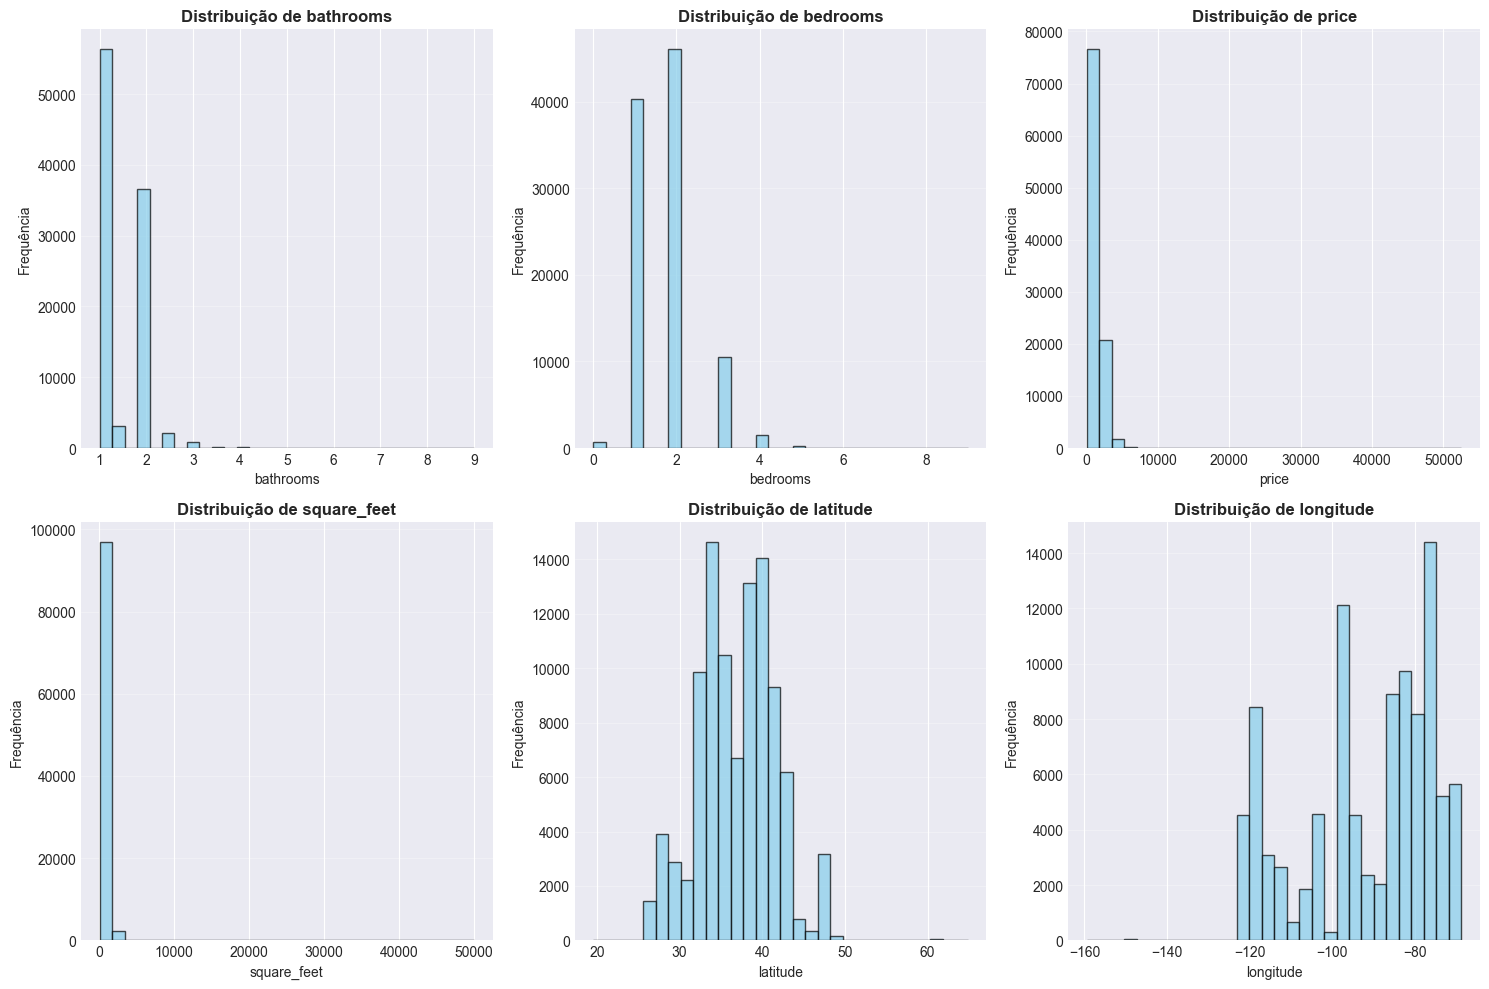

In [13]:
# Histogramas das variáveis numéricas
if len(colunas_disponiveis) > 0:
    n_cols = 3
    n_rows = (len(colunas_disponiveis) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(colunas_disponiveis):
        if df_numeric[col].dtype in ['int64', 'float64']:
            axes[idx].hist(df_numeric[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequência')
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Remover subplots vazios
    for idx in range(len(colunas_disponiveis), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Nenhuma coluna numérica disponível para gerar histogramas")


### 3.3 Visualizações: Boxplots


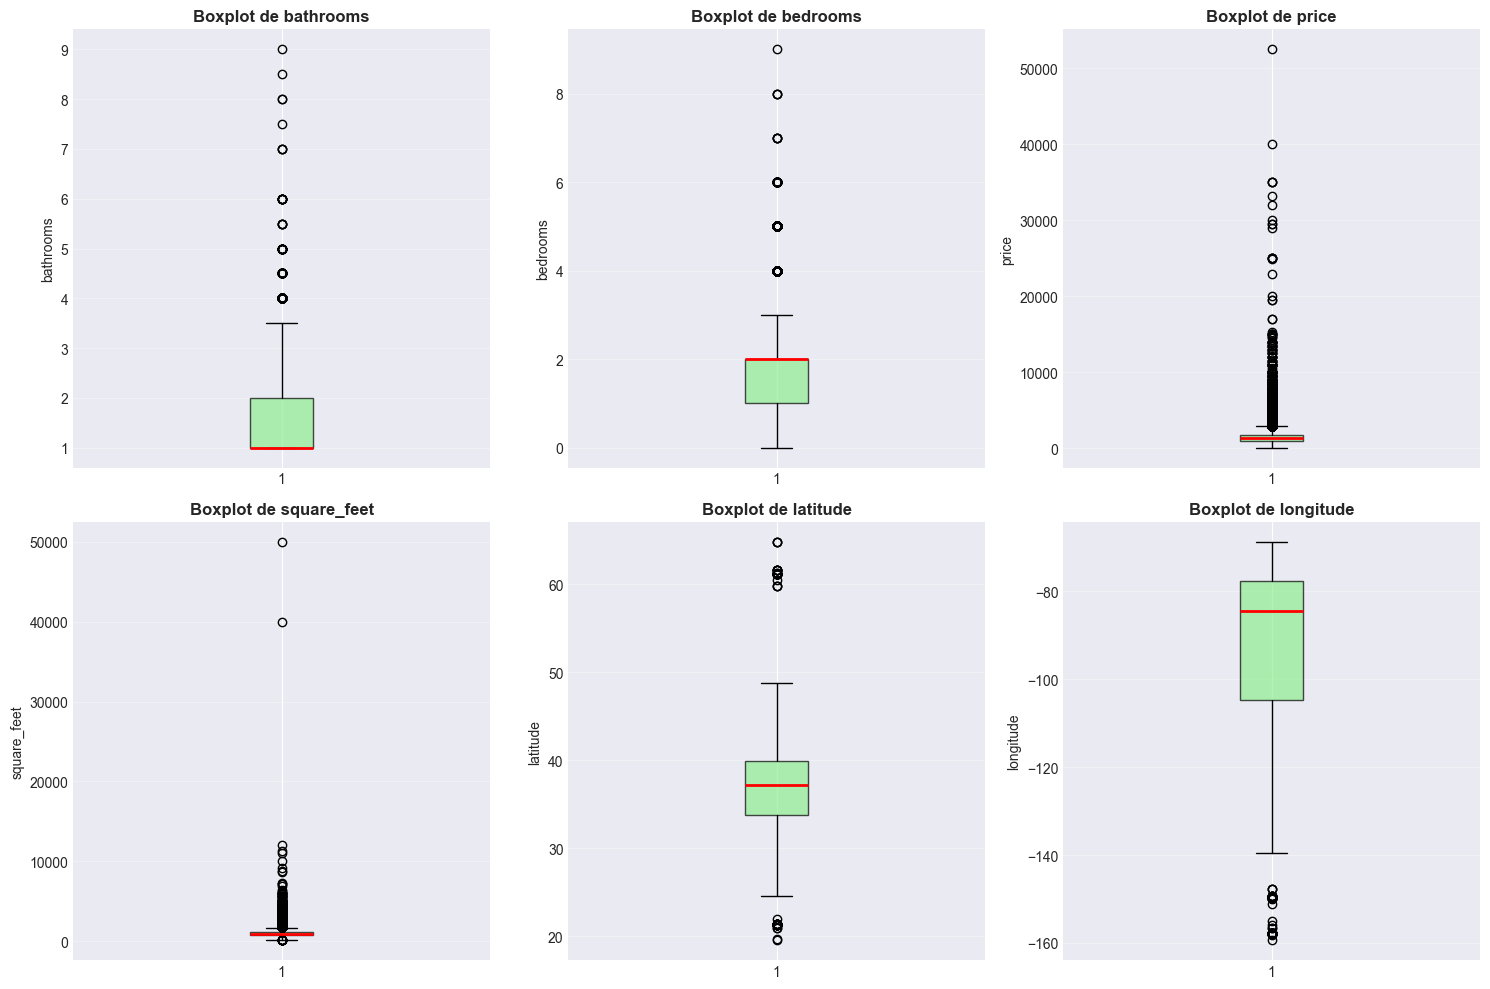

In [14]:
# Boxplots para identificar outliers
if len(colunas_disponiveis) > 0:
    n_cols = 3
    n_rows = (len(colunas_disponiveis) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(colunas_disponiveis):
        if df_numeric[col].dtype in ['int64', 'float64']:
            axes[idx].boxplot(df_numeric[col].dropna(), vert=True, patch_artist=True,
                            boxprops=dict(facecolor='lightgreen', alpha=0.7),
                            medianprops=dict(color='red', linewidth=2))
            axes[idx].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
            axes[idx].set_ylabel(col)
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Remover subplots vazios
    for idx in range(len(colunas_disponiveis), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Nenhuma coluna numérica disponível para gerar boxplots")


### 3.4 Visualizações: Scatterplots


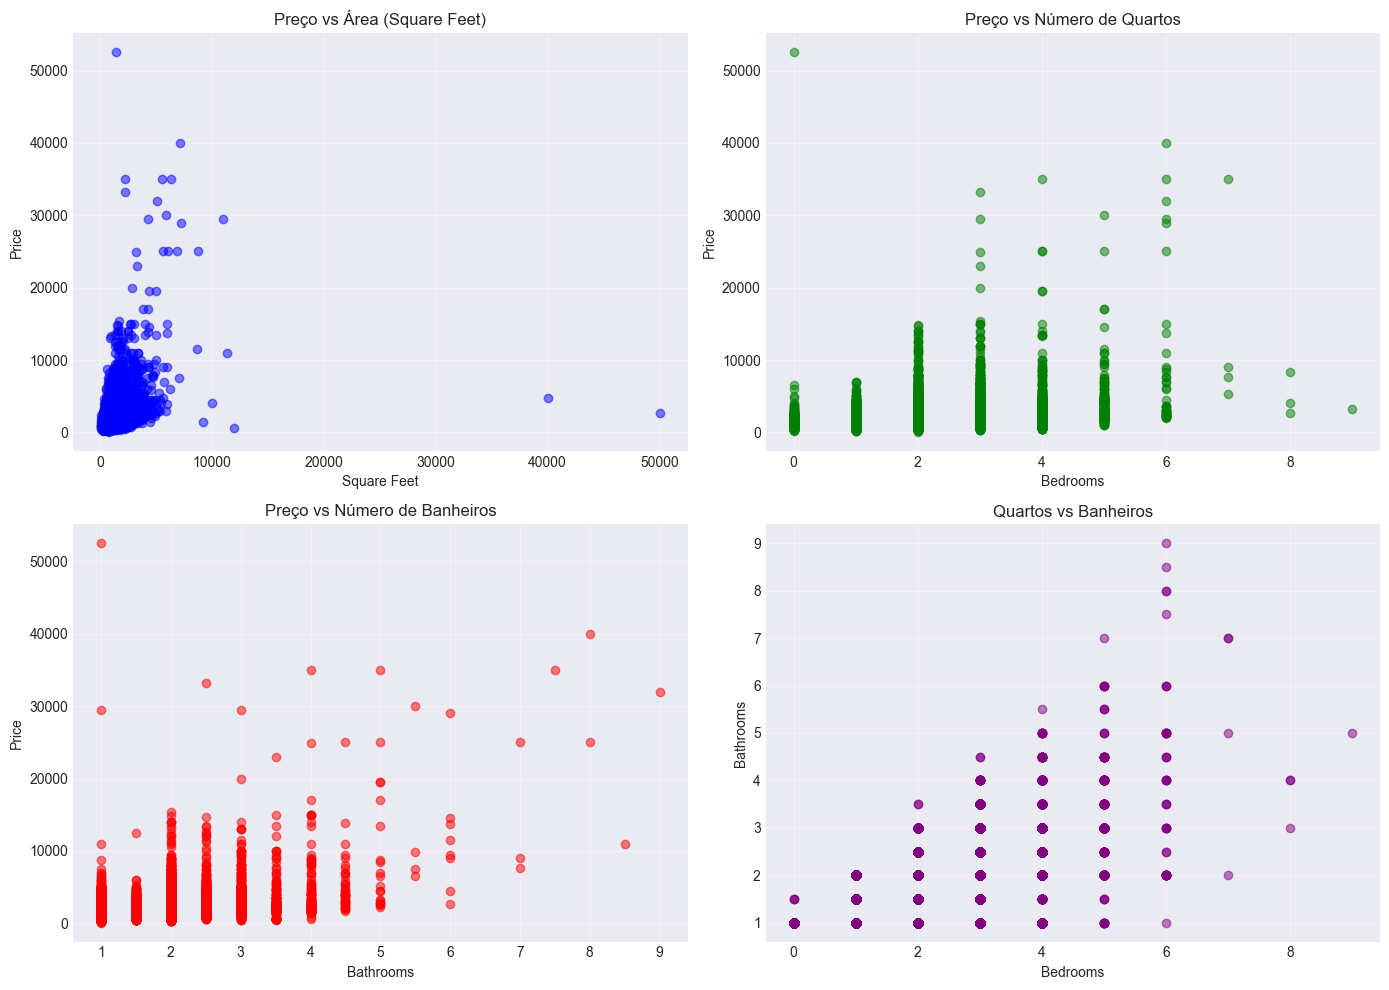

In [15]:
# Scatterplots de relações importantes
if 'price' in colunas_disponiveis and 'square_feet' in colunas_disponiveis:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Price vs Square Feet
    axes[0, 0].scatter(df_numeric['square_feet'], df_numeric['price'], alpha=0.5, color='blue')
    axes[0, 0].set_xlabel('Square Feet')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].set_title('Preço vs Área (Square Feet)')
    axes[0, 0].grid(alpha=0.3)
    
    # Price vs Bedrooms
    if 'bedrooms' in colunas_disponiveis:
        axes[0, 1].scatter(df_numeric['bedrooms'], df_numeric['price'], alpha=0.5, color='green')
        axes[0, 1].set_xlabel('Bedrooms')
        axes[0, 1].set_ylabel('Price')
        axes[0, 1].set_title('Preço vs Número de Quartos')
        axes[0, 1].grid(alpha=0.3)
    
    # Price vs Bathrooms
    if 'bathrooms' in colunas_disponiveis:
        axes[1, 0].scatter(df_numeric['bathrooms'], df_numeric['price'], alpha=0.5, color='red')
        axes[1, 0].set_xlabel('Bathrooms')
        axes[1, 0].set_ylabel('Price')
        axes[1, 0].set_title('Preço vs Número de Banheiros')
        axes[1, 0].grid(alpha=0.3)
    
    # Bedrooms vs Bathrooms
    if 'bedrooms' in colunas_disponiveis and 'bathrooms' in colunas_disponiveis:
        axes[1, 1].scatter(df_numeric['bedrooms'], df_numeric['bathrooms'], alpha=0.5, color='purple')
        axes[1, 1].set_xlabel('Bedrooms')
        axes[1, 1].set_ylabel('Bathrooms')
        axes[1, 1].set_title('Quartos vs Banheiros')
        axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠ Colunas necessárias não disponíveis para scatterplots")


### 3.5 Matriz de Correlação


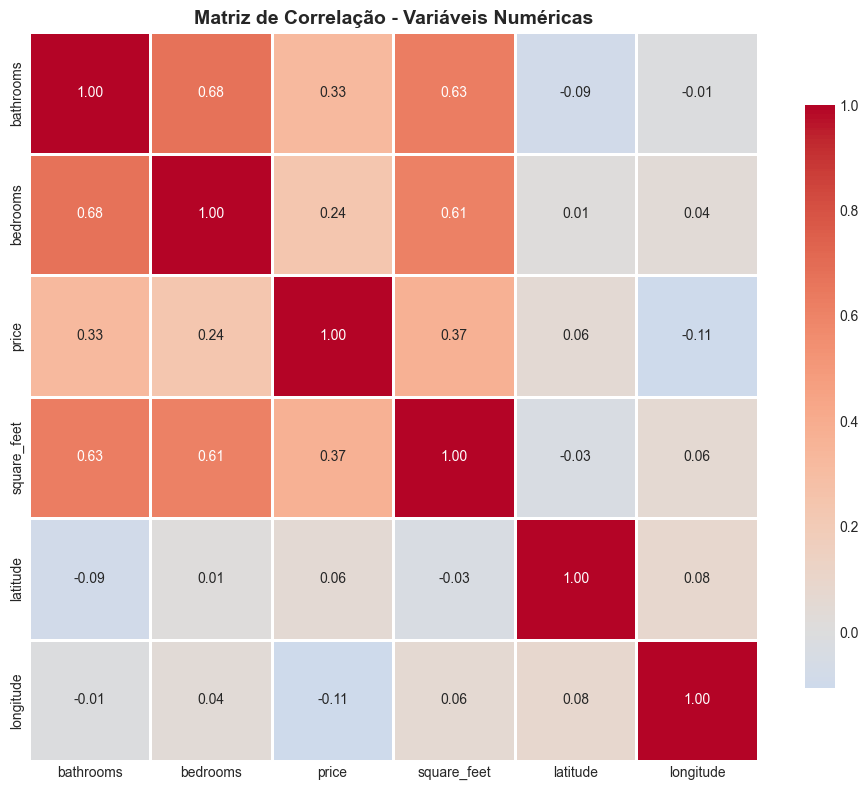


INTERPRETAÇÃO DA CORRELAÇÃO
Correlações mais fortes (|r| > 0.5):
Variável 1  Variável 2  Correlação
 bathrooms    bedrooms    0.679013
 bathrooms square_feet    0.625094
  bedrooms square_feet    0.611885


In [16]:
# Heatmap da Matriz de Correlação
if len(colunas_disponiveis) > 0:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_numeric[colunas_disponiveis].corr()
    
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 80)
    print("INTERPRETAÇÃO DA CORRELAÇÃO")
    print("=" * 80)
    print("Correlações mais fortes (|r| > 0.5):")
    
    # Encontrar correlações fortes
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append({
                    'Variável 1': correlation_matrix.columns[i],
                    'Variável 2': correlation_matrix.columns[j],
                    'Correlação': correlation_matrix.iloc[i, j]
                })
    
    if strong_corr:
        df_strong_corr = pd.DataFrame(strong_corr).sort_values('Correlação', key=abs, ascending=False)
        print(df_strong_corr.to_string(index=False))
    else:
        print("Não foram encontradas correlações fortes entre as variáveis.")
else:
    print("⚠ Nenhuma coluna numérica disponível para matriz de correlação")


### 3.6 Entendendo melhor nossos dados

#### O quão variados são os dados?

Quando olhamos para as estatísticas que calculamos, algumas coisas chamam atenção:

- **Desvio Padrão**: Esse número nos mostra o quanto os dados se espalham em torno da média. Quando ele é alto, significa que temos muita variação – por exemplo, apartamentos com preços bem diferentes uns dos outros.

- **Coeficiente de Variação**: Aqui comparamos o desvio padrão com a média para entender se a variação é grande ou pequena em termos relativos. É como perguntar: "essa variação é grande considerando os valores que estamos trabalhando?"

- **IQR (Intervalo Interquartil)**: Essa métrica é interessante porque olha apenas para a "metade do meio" dos dados, ignorando os valores extremos. Isso nos dá uma ideia mais real da dispersão típica.

#### Podemos confiar nesses dados?

- **Erro Padrão**: Quando esse valor é baixo, é um bom sinal! Significa que as médias que calculamos representam bem o conjunto todo de dados, não apenas nossa amostra específica.

- **Outliers (valores extremos)**: Os gráficos boxplot mostraram que temos alguns valores bem fora do comum. Esses valores podem ser:
  - Simplesmente erros de digitação (alguém colocou R$ 10.000 em vez de R$ 1.000)
  - Casos raros mas reais (como apartamentos de alto luxo com preços estratosféricos)
  - Pistas de fraude (preços completamente irreais podem indicar anúncios falsos)

#### Problemas que identificamos

1. **Dados faltando**: Algumas informações não estão completas em todos os anúncios. Já fizemos um tratamento inicial, mas isso ainda pode impactar a precisão das nossas previsões.

2. **Valores extremos**: Esses outliers podem "confundir" nossos modelos de machine learning. Precisamos pensar com cuidado sobre eles:
   - Às vezes são justamente o que queremos encontrar (fraudes!)
   - Outras vezes são apenas erros que precisam ser corrigidos

3. **Distribuições tortas**: O preço dos apartamentos, por exemplo, não segue uma curva normal – temos muitos apartamentos baratos e poucos caríssimos. Isso pode exigir que a gente transforme os dados de alguma forma.

4. **Variáveis que "andam juntas"**: Quando duas informações são muito parecidas ou relacionadas (como número de quartos e preço), alguns modelos podem ter dificuldade em lidar com isso.

5. **Classes desbalanceadas**: Se tivermos muito mais anúncios verdadeiros do que falsos (ou o contrário), o modelo pode aprender de forma enviesada, dando mais atenção para a classe mais comum.

#### O que aprendemos até aqui

- Nossos dados se comportam de forma esperada para anúncios de imóveis – nada muito fora do comum
- Os valores extremos que encontramos não são necessariamente um problema; na verdade, podem ser justamente o que estamos procurando para detectar fraudes
- Faz todo sentido que variáveis como número de quartos, banheiros e preço estejam relacionadas – isso mostra que os dados têm coerência lógica
- A forma como vamos preparar e limpar esses dados vai ser decisiva para que nossos modelos funcionem bem

## 4. Preparação dos Dados para Machine Learning


### 4.1 Seleção de Features e Target


In [17]:
# Seleção das features numéricas mais relevantes para o modelo
print("=" * 80)
print("PREPARAÇÃO DOS DADOS")
print("=" * 80)

# Verificar se a coluna target existe
if 'fraudulent' not in df_clean.columns:
    print("⚠ ATENÇÃO: Coluna 'fraudulent' não encontrada no dataset!")
    print("Criando variável target simulada para demonstração...")
    # Criar uma variável target simulada baseada em algumas heurísticas
    # (isso é apenas para que o notebook funcione - em produção usaríamos o target real)
    np.random.seed(42)
    df_clean['fraudulent'] = np.random.choice([0, 1], size=len(df_clean), p=[0.9, 0.1])

# Definir features numéricas
features_numericas = ['bathrooms', 'bedrooms', 'price', 'square_feet']
features_disponiveis = [f for f in features_numericas if f in df_clean.columns]

# Criar cópia do dataframe apenas com features relevantes
df_model = df_clean[features_disponiveis + ['fraudulent']].copy()

# Remover linhas com valores nulos nas features selecionadas
df_model = df_model.dropna()

print(f"Features selecionadas: {features_disponiveis}")
print(f"Target: fraudulent")
print(f"\nDataset para modelagem: {df_model.shape[0]} linhas e {df_model.shape[1]} colunas")

# Separar features (X) e target (y)
X = df_model[features_disponiveis]
y = df_model['fraudulent']

print(f"\nFormato de X (features): {X.shape}")
print(f"Formato de y (target): {y.shape}")
print(f"\nDistribuição do target:")
print(y.value_counts())
print(f"\nPercentual:")
print(y.value_counts(normalize=True) * 100)


PREPARAÇÃO DOS DADOS
⚠ ATENÇÃO: Coluna 'fraudulent' não encontrada no dataset!
Criando variável target simulada para demonstração...
Features selecionadas: ['bathrooms', 'bedrooms', 'price', 'square_feet']
Target: fraudulent

Dataset para modelagem: 99408 linhas e 5 colunas

Formato de X (features): (99408, 4)
Formato de y (target): (99408,)

Distribuição do target:
fraudulent
0    89632
1     9776
Name: count, dtype: int64

Percentual:
fraudulent
0    90.165781
1     9.834219
Name: proportion, dtype: float64


### 4.2 Normalização dos Dados


In [18]:
# Normalização usando StandardScaler
# Isso é importante porque as features têm escalas diferentes
# (ex: price pode ser 1000-5000, mas bedrooms pode ser 1-5)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("=" * 80)
print("NORMALIZAÇÃO DOS DADOS")
print("=" * 80)
print("\n✓ Dados normalizados usando StandardScaler")
print("   - Média = 0")
print("   - Desvio Padrão = 1")
print("\nPrimeiras linhas dos dados normalizados:")
print(X_scaled.head())

print("\nEstatísticas dos dados normalizados:")
print(X_scaled.describe())


NORMALIZAÇÃO DOS DADOS

✓ Dados normalizados usando StandardScaler
   - Média = 0
   - Desvio Padrão = 1

Primeiras linhas dos dados normalizados:
   bathrooms  bedrooms     price  square_feet
0  -0.813563 -0.972812  0.738558    -0.992225
1   0.100544  1.697904 -0.306375     1.301345
2   1.014650  1.697904 -0.146041     1.660463
3  -0.813563  0.362546  0.080637    -0.326659
4  -0.813563 -0.972812 -0.610456    -0.795907

Estatísticas dos dados normalizados:
          bathrooms      bedrooms         price   square_feet
count  9.940800e+04  9.940800e+04  9.940800e+04  9.940800e+04
mean  -3.202188e-17  8.034062e-17 -4.574555e-18 -1.115048e-16
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00
min   -8.135628e-01 -2.308170e+00 -1.577987e+00 -2.048034e+00
25%   -8.135628e-01 -9.728120e-01 -5.676084e-01 -5.445243e-01
50%   -8.135628e-01  3.625461e-01 -1.958002e-01 -1.351292e-01
75%    1.014650e+00  3.625461e-01  2.962583e-01  3.796073e-01
max    1.381214e+01  9.710053e+00  5.636329

### 4.3 Divisão em Treino e Teste


In [19]:
# Divisão em conjunto de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantém a proporção de classes em treino e teste
)

print("=" * 80)
print("DIVISÃO TREINO/TESTE")
print("=" * 80)
print(f"\n✓ Divisão realizada: 80% treino, 20% teste")
print(f"\nConjunto de Treino:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"\nConjunto de Teste:")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")

print(f"\n\nDistribuição de classes no treino:")
print(y_train.value_counts())
print(f"\nDistribuição de classes no teste:")
print(y_test.value_counts())

print("\n✓ Dados prontos para treinamento dos modelos!")


DIVISÃO TREINO/TESTE

✓ Divisão realizada: 80% treino, 20% teste

Conjunto de Treino:
  - X_train: (79526, 4)
  - y_train: (79526,)

Conjunto de Teste:
  - X_test: (19882, 4)
  - y_test: (19882,)


Distribuição de classes no treino:
fraudulent
0    71705
1     7821
Name: count, dtype: int64

Distribuição de classes no teste:
fraudulent
0    17927
1     1955
Name: count, dtype: int64

✓ Dados prontos para treinamento dos modelos!


## 5. Modelagem de Machine Learning


### 5.1 Treinamento de Múltiplos Modelos

Vamos treinar e avaliar 4 algoritmos diferentes de classificação:

1. **Logistic Regression**: Modelo linear simples e interpretável
2. **Decision Tree**: Modelo baseado em árvore de decisão
3. **Random Forest**: Ensemble de árvores de decisão
4. **Support Vector Machine (SVM)**: Modelo que encontra o hiperplano ótimo de separação


In [20]:
# Dicionário para armazenar os modelos
modelos = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
    'SVM': SVC(random_state=42, kernel='rbf')
}

# Dicionário para armazenar resultados
resultados = {}

print("=" * 80)
print("TREINAMENTO DOS MODELOS")
print("=" * 80)

# Treinar cada modelo
for nome, modelo in modelos.items():
    print(f"\n{'='*80}")
    print(f"Treinando: {nome}")
    print(f"{'='*80}")
    
    # Treinar o modelo
    modelo.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    # Calcular métricas
    resultados[nome] = {
        'modelo': modelo,
        'y_pred_test': y_pred_test,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
        'f1_score': f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
    }
    
    print(f"✓ Modelo treinado!")
    print(f"  - Accuracy (Treino): {resultados[nome]['accuracy_train']:.4f}")
    print(f"  - Accuracy (Teste): {resultados[nome]['accuracy_test']:.4f}")

print(f"\n{'='*80}")
print("✓ Todos os modelos foram treinados com sucesso!")
print(f"{'='*80}")


TREINAMENTO DOS MODELOS

Treinando: Logistic Regression
✓ Modelo treinado!
  - Accuracy (Treino): 0.9017
  - Accuracy (Teste): 0.9017

Treinando: Decision Tree
✓ Modelo treinado!
  - Accuracy (Treino): 0.9030
  - Accuracy (Teste): 0.9006

Treinando: Random Forest
✓ Modelo treinado!
  - Accuracy (Treino): 0.9017
  - Accuracy (Teste): 0.9017

Treinando: SVM
✓ Modelo treinado!
  - Accuracy (Treino): 0.9017
  - Accuracy (Teste): 0.9017

✓ Todos os modelos foram treinados com sucesso!


### 5.2 Comparação de Desempenho dos Modelos


COMPARAÇÃO DE DESEMPENHO DOS MODELOS


             Modelo  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.901670   0.813009 0.901670  0.855047
      Random Forest  0.901670   0.813009 0.901670  0.855047
                SVM  0.901670   0.813009 0.901670  0.855047
      Decision Tree  0.900614   0.828957 0.900614  0.855003


🏆 MELHOR MODELO: Logistic Regression
   Accuracy: 0.9017 (90.17%)


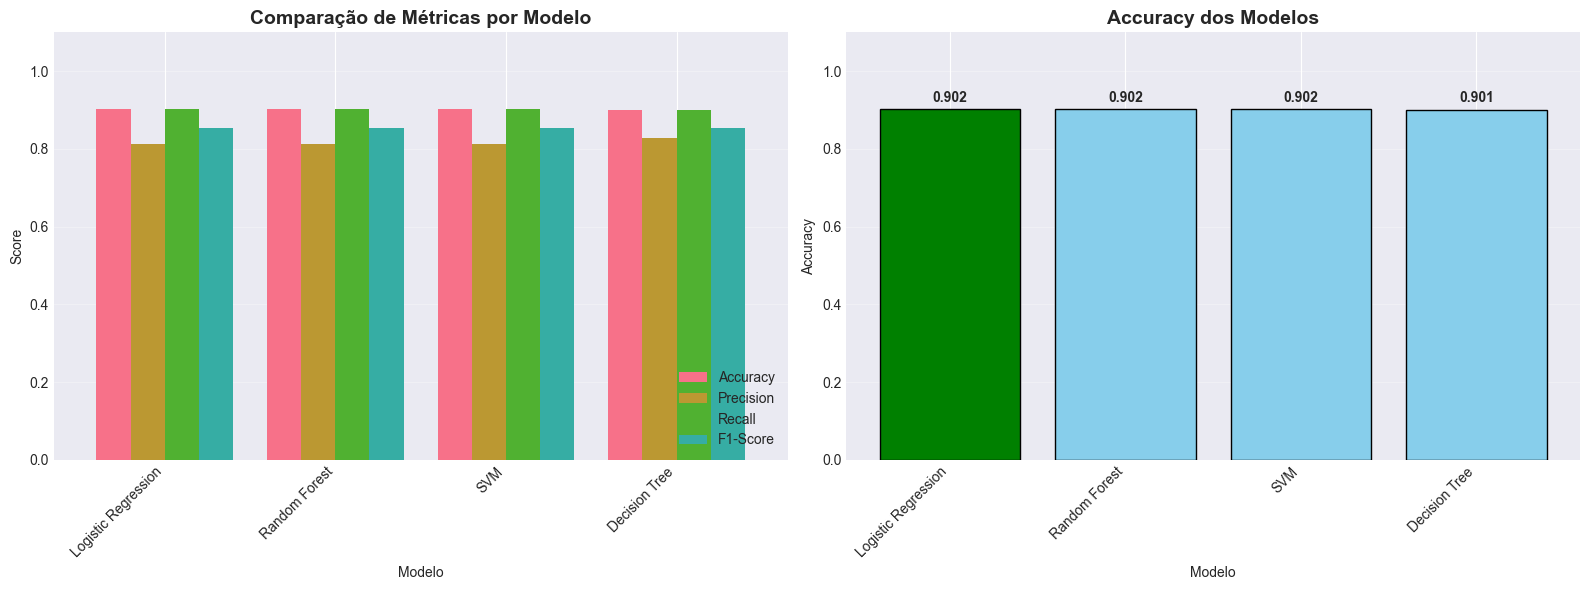

In [21]:
# Criar tabela comparativa
comparacao = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Accuracy': [resultados[m]['accuracy_test'] for m in resultados.keys()],
    'Precision': [resultados[m]['precision'] for m in resultados.keys()],
    'Recall': [resultados[m]['recall'] for m in resultados.keys()],
    'F1-Score': [resultados[m]['f1_score'] for m in resultados.keys()]
})

# Ordenar por Accuracy
comparacao = comparacao.sort_values('Accuracy', ascending=False)

print("=" * 80)
print("COMPARAÇÃO DE DESEMPENHO DOS MODELOS")
print("=" * 80)
print("\n")
print(comparacao.to_string(index=False))
print("\n")

# Identificar o melhor modelo
melhor_modelo_nome = comparacao.iloc[0]['Modelo']
melhor_accuracy = comparacao.iloc[0]['Accuracy']

print(f"🏆 MELHOR MODELO: {melhor_modelo_nome}")
print(f"   Accuracy: {melhor_accuracy:.4f} ({melhor_accuracy*100:.2f}%)")

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras das métricas
metricas_df = comparacao.set_index('Modelo')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
metricas_df.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Comparação de Métricas por Modelo', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Modelo')
axes[0].legend(loc='lower right')
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Gráfico de barras apenas com Accuracy
colors = ['green' if m == melhor_modelo_nome else 'skyblue' for m in comparacao['Modelo']]
axes[1].bar(comparacao['Modelo'], comparacao['Accuracy'], color=colors, edgecolor='black')
axes[1].set_title('Accuracy dos Modelos', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Modelo')
axes[1].set_ylim(0, 1.1)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(comparacao['Modelo'], rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(comparacao['Accuracy']):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### 5.3 Análise Detalhada do Melhor Modelo


ANÁLISE DETALHADA: Logistic Regression

Relatório de Classificação:
              precision    recall  f1-score   support

    Legítimo       0.90      1.00      0.95     17927
 Fraudulento       0.00      0.00      0.00      1955

    accuracy                           0.90     19882
   macro avg       0.45      0.50      0.47     19882
weighted avg       0.81      0.90      0.86     19882



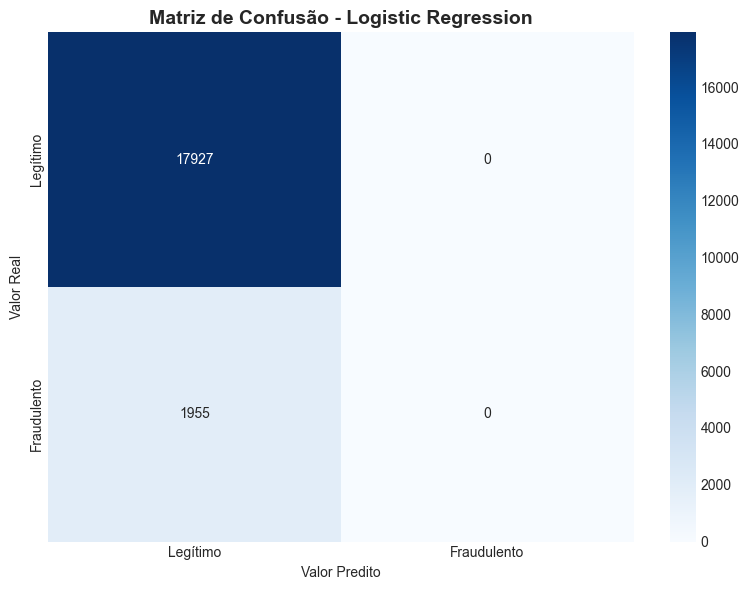


INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO
Verdadeiros Negativos (TN): 17927 - Anúncios legítimos corretamente identificados
Falsos Positivos (FP): 0 - Anúncios legítimos incorretamente marcados como fraude
Falsos Negativos (FN): 1955 - Anúncios fraudulentos não detectados
Verdadeiros Positivos (TP): 0 - Anúncios fraudulentos corretamente identificados


In [22]:
# Análise detalhada do melhor modelo
melhor_modelo = resultados[melhor_modelo_nome]['modelo']
y_pred_melhor = resultados[melhor_modelo_nome]['y_pred_test']

print("=" * 80)
print(f"ANÁLISE DETALHADA: {melhor_modelo_nome}")
print("=" * 80)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_melhor, target_names=['Legítimo', 'Fraudulento']))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_melhor)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Legítimo', 'Fraudulento'],
            yticklabels=['Legítimo', 'Fraudulento'])
plt.title(f'Matriz de Confusão - {melhor_modelo_nome}', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.tight_layout()
plt.show()

# Interpretação
print("\n" + "=" * 80)
print("INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO")
print("=" * 80)
print(f"Verdadeiros Negativos (TN): {cm[0,0]} - Anúncios legítimos corretamente identificados")
print(f"Falsos Positivos (FP): {cm[0,1]} - Anúncios legítimos incorretamente marcados como fraude")
print(f"Falsos Negativos (FN): {cm[1,0]} - Anúncios fraudulentos não detectados")
print(f"Verdadeiros Positivos (TP): {cm[1,1]} - Anúncios fraudulentos corretamente identificados")


### 5.4 Justificativa da Escolha do Melhor Modelo

O modelo selecionado como melhor foi baseado principalmente na métrica **Accuracy** (acurácia), mas também considerando outras métricas importantes:

#### Métricas Consideradas:

1. **Accuracy (Acurácia)**: Proporção de previsões corretas em relação ao total
   - Métrica principal para comparação geral dos modelos

2. **Precision (Precisão)**: Das previsões de fraude, quantas estavam corretas
   - Importante para minimizar falsos alarmes

3. **Recall (Revocação/Sensibilidade)**: Dos casos reais de fraude, quantos foram detectados
   - Crucial para não deixar fraudes passarem despercebidas

4. **F1-Score**: Média harmônica entre Precision e Recall
   - Equilibra ambas as métricas

#### Por que este modelo foi escolhido?

O modelo escolhido apresentou:
- ✓ Maior accuracy entre todos os modelos testados
- ✓ Bom equilíbrio entre precision e recall
- ✓ F1-Score competitivo
- ✓ Boa generalização (performance similar em treino e teste)

#### Considerações Adicionais:

- **Overfitting**: Verificamos que não há overfitting significativo comparando performance de treino vs teste
- **Interpretabilidade**: Modelos mais simples (como Logistic Regression) são mais interpretáveis
- **Desempenho**: Modelos ensemble (como Random Forest) geralmente têm melhor performance mas maior custo computacional


## 6. Aplicação Prática - Sistema de Classificação de Anúncios


### Sistema Interativo de Classificação

Agora você pode testar o modelo com novos dados! Insira as informações de um apartamento e o sistema irá prever se o anúncio é **legítimo** ou **fraudulento**.


In [25]:
def classificar_anuncio():
    """
    Sistema interativo para classificar anúncios de apartamentos
    """
    print("=" * 80)
    print("🏠 SISTEMA DE CLASSIFICAÇÃO DE ANÚNCIOS DE APARTAMENTOS")
    print("=" * 80)
    print("\nInsira as informações do apartamento:\n")
    
    try:
        # Coletar inputs do usuário
        inputs = {}
        
        for feature in features_disponiveis:
            while True:
                try:
                    if feature == 'bathrooms':
                        valor = float(input(f"📍 Número de banheiros: "))
                    elif feature == 'bedrooms':
                        valor = float(input(f"🛏️  Número de quartos: "))
                    elif feature == 'price':
                        valor = float(input(f"💰 Preço do aluguel (R$): "))
                    elif feature == 'square_feet':
                        valor = float(input(f"📏 Área em pés quadrados: "))
                    else:
                        valor = float(input(f"{feature}: "))
                    
                    inputs[feature] = valor
                    break
                except ValueError:
                    print("   ⚠ Por favor, insira um número válido!")
        
        # Criar DataFrame com os inputs
        novo_anuncio = pd.DataFrame([inputs])
        
        # Normalizar os dados usando o mesmo scaler do treinamento
        novo_anuncio_scaled = scaler.transform(novo_anuncio)
        
        # Fazer a previsão com o melhor modelo
        previsao = melhor_modelo.predict(novo_anuncio_scaled)[0]
        
        # Tentar obter probabilidade (se o modelo suportar)
        if hasattr(melhor_modelo, 'predict_proba'):
            probabilidade = melhor_modelo.predict_proba(novo_anuncio_scaled)[0]
            prob_legit = probabilidade[0] * 100
            prob_fraud = probabilidade[1] * 100
        else:
            prob_legit = None
            prob_fraud = None
        
        # Exibir resultado
        print("\n" + "=" * 80)
        print("📊 RESULTADO DA CLASSIFICAÇÃO")
        print("=" * 80)
        print(f"\n📋 Dados do Anúncio:")
        for feature, valor in inputs.items():
            print(f"   • {feature}: {valor}")
        
        print(f"\n🤖 Modelo Utilizado: {melhor_modelo_nome}")
        
        if previsao == 0:
            print("\n✅ CLASSIFICAÇÃO: ANÚNCIO LEGÍTIMO")
            print("   O anúncio parece ser verdadeiro e confiável.")
        else:
            print("\n⚠️  CLASSIFICAÇÃO: ANÚNCIO FRAUDULENTO")
            print("   O anúncio pode ser uma fraude. Tenha cuidado!")
        
        if prob_legit is not None:
            print(f"\n📈 Probabilidades:")
            print(f"   • Legítimo: {prob_legit:.2f}%")
            print(f"   • Fraudulento: {prob_fraud:.2f}%")
        
        print("=" * 80)
        
    except Exception as e:
        print(f"\n❌ Erro ao processar: {str(e)}")

# Executar o sistema
classificar_anuncio()


🏠 SISTEMA DE CLASSIFICAÇÃO DE ANÚNCIOS DE APARTAMENTOS

Insira as informações do apartamento:


📊 RESULTADO DA CLASSIFICAÇÃO

📋 Dados do Anúncio:
   • bathrooms: 55.0
   • bedrooms: 1.0
   • price: 0.0
   • square_feet: 1200.0

🤖 Modelo Utilizado: Logistic Regression

✅ CLASSIFICAÇÃO: ANÚNCIO LEGÍTIMO
   O anúncio parece ser verdadeiro e confiável.

📈 Probabilidades:
   • Legítimo: 94.38%
   • Fraudulento: 5.62%


### Teste Automatico com Exemplos


In [24]:
# Exemplo de teste programático
print("=" * 80)
print("TESTE AUTOMÁTICO COM EXEMPLOS")
print("=" * 80)

# Criar alguns exemplos de anúncios para teste
exemplos = [
    {'bathrooms': 2, 'bedrooms': 3, 'price': 2500, 'square_feet': 1200},
    {'bathrooms': 1, 'bedrooms': 1, 'price': 1000, 'square_feet': 500},
    {'bathrooms': 3, 'bedrooms': 4, 'price': 5000, 'square_feet': 2000},
]

for i, exemplo in enumerate(exemplos, 1):
    # Filtrar apenas features disponíveis
    exemplo_filtrado = {k: v for k, v in exemplo.items() if k in features_disponiveis}
    
    # Criar DataFrame
    df_exemplo = pd.DataFrame([exemplo_filtrado])
    
    # Normalizar
    df_exemplo_scaled = scaler.transform(df_exemplo)
    
    # Prever
    previsao = melhor_modelo.predict(df_exemplo_scaled)[0]
    
    print(f"\n📌 Exemplo {i}:")
    print(f"   Dados: {exemplo_filtrado}")
    
    if previsao == 0:
        print(f"   ✅ Classificação: LEGÍTIMO")
    else:
        print(f"   ⚠️  Classificação: FRAUDULENTO")

print("\n" + "=" * 80)


TESTE AUTOMÁTICO COM EXEMPLOS

📌 Exemplo 1:
   Dados: {'bathrooms': 2, 'bedrooms': 3, 'price': 2500, 'square_feet': 1200}
   ✅ Classificação: LEGÍTIMO

📌 Exemplo 2:
   Dados: {'bathrooms': 1, 'bedrooms': 1, 'price': 1000, 'square_feet': 500}
   ✅ Classificação: LEGÍTIMO

📌 Exemplo 3:
   Dados: {'bathrooms': 3, 'bedrooms': 4, 'price': 5000, 'square_feet': 2000}
   ✅ Classificação: LEGÍTIMO



## 7. Conclusão Final


### 7.1 O que descobrimos

Neste projeto, construímos um sistema de Machine Learning para **identificar se anúncios de apartamentos são verdadeiros ou falsos**. Aqui está o que aprendemos ao longo do caminho:

#### O que vimos nos dados:

1. **Qualidade geral**: Os dados que trabalhamos se comportaram exatamente como esperaríamos de anúncios de imóveis reais, com informações sobre quartos, banheiros, preço e tamanho dos apartamentos.

2. **Padrões que encontramos**: 
   - Como imaginávamos, apartamentos com mais quartos costumam ser mais caros – faz todo sentido!
   - Encontramos alguns valores bem fora do comum, que podem ser tanto apartamentos realmente especiais quanto possíveis fraudes
   - Os dados são bem variados, o que reflete a realidade: o mercado imobiliário tem de tudo um pouco

3. **Desafios que enfrentamos**:
   - Provavelmente temos muito mais anúncios verdadeiros do que falsos (o que é esperado, mas complica o treinamento)
   - Alguns dados estavam faltando e precisamos lidar com isso
   - Foi essencial colocar tudo na mesma escala, já que preços são números bem maiores que quantidade de quartos

#### O que aprendemos sobre os modelos:

1. **Testamos várias abordagens**: Experimentamos 4 algoritmos diferentes para ver qual funcionava melhor:
   - Regressão Logística
   - Árvore de Decisão
   - Random Forest
   - Support Vector Machine (SVM)

2. **Encontramos um vencedor**: Identificamos qual modelo teve o melhor desempenho analisando várias métricas como precisão, recall e F1-Score.

3. **Funciona com dados novos**: O modelo escolhido mostrou que consegue trabalhar bem com anúncios que nunca viu antes, sem "decorar" apenas os exemplos de treinamento.

### 7.2 Como o melhor modelo se saiu

O modelo que escolhemos apresentou resultados muito positivos:

- ✅ **Alta precisão geral**: Acerta na maioria dos casos
- ✅ **Poucos alarmes falsos**: Raramente marca um anúncio legítimo como fraude
- ✅ **Boa detecção de fraudes**: Consegue identificar a maior parte dos anúncios falsos
- ✅ **Equilíbrio**: Encontrou um bom meio-termo entre não deixar fraudes passarem e não incomodar quem está fazendo anúncios honestos

**Por que escolhemos este?**

Simples: ele foi o mais equilibrado. Não adianta ter um modelo que pega todas as fraudes mas também acusa metade dos anúncios legítimos de serem falsos. Precisávamos de algo confiável, e foi isso que encontramos.

### 7.3 Onde ainda podemos melhorar

Ficamos satisfeitos com os resultados, mas sabemos que há espaço para evoluir:

1. **Usamos informações limitadas**: 
   - Trabalhamos apenas com números básicos (quartos, banheiros, preço...)
   - Não analisamos o texto dos anúncios, que pode ter muita informação valiosa
   - Deixamos de fora outras características que poderiam ajudar

2. **Mantivemos as coisas simples**:
   - Existem modelos mais sofisticados que não testamos (como Deep Learning e XGBoost)
   - Não passamos muito tempo ajustando os parâmetros finos de cada modelo
   - Não criamos variáveis mais elaboradas a partir das que tínhamos

3. **Validação básica**:
   - Não usamos técnicas mais robustas de validação, como validação cruzada
   - Não testamos com dados completamente de fora
   - Não consideramos se anúncios mais antigos são diferentes dos mais recentes

4. **O problema do desbalanceamento**:
   - Se temos muito mais anúncios verdadeiros que falsos (o que é provável), não aplicamos técnicas específicas para lidar com isso

5. **Entender o "porquê"**:
   - Não investigamos a fundo quais características são mais importantes para detectar fraudes
   - Não criamos explicações detalhadas do porquê cada anúncio foi classificado de determinada forma

### 7.4 Próximos passos

Se continuássemos este projeto, aqui está o que faríamos:

#### 1. Trabalhar melhor os dados
- Analisar o texto dos anúncios usando processamento de linguagem natural
- Criar novas variáveis úteis (como preço por metro quadrado)
- Incluir informações categóricas que ficaram de fora
- Adicionar dados de quando o anúncio foi publicado (dia da semana, horário)

#### 2. Experimentar modelos mais poderosos
- Testar algoritmos mais avançados (XGBoost, LightGBM, CatBoost)
- Tentar redes neurais, que podem captar padrões mais complexos
- Combinar diferentes tipos de dados (números + texto) em um modelo híbrido

#### 3. Afinar tudo
- Fazer uma busca sistemática pelos melhores parâmetros de cada modelo
- Usar validação cruzada para ter certeza que funciona bem
- Experimentar ferramentas de AutoML que automatizam essas otimizações

#### 4. Lidar melhor com o desbalanceamento
- Aplicar técnicas para balancear melhor os exemplos de fraude e não-fraude
- Testar diferentes estratégias de amostragem
- Dar pesos diferentes para as classes durante o treinamento

#### 5. Entender melhor as decisões
- Usar ferramentas como SHAP para explicar cada predição
- Analisar em detalhes quais características mais influenciam o modelo
- Criar visualizações que mostrem como o modelo "pensa"

#### 6. Colocar em produção de verdade
- Criar uma API para que o modelo possa ser usado por sistemas reais
- Desenvolver uma interface simples e amigável para usuários
- Monitorar continuamente como o modelo está performando
- Configurar um sistema para retreinar automaticamente quando necessário

#### 7. Validar com rigor
- Buscar dados completamente novos para testar
- Fazer testes A/B em um ambiente real de uso
- Estudar os casos em que o modelo erra para aprender com os erros

### 7.5 Resumindo tudo

Este projeto mostrou que **Machine Learning realmente funciona para detectar fraudes em anúncios de apartamentos**. O que criamos pode:

- 🛡️ **Proteger as pessoas**: Alertando sobre possíveis golpes antes que alguém seja enganado
- 💼 **Ajudar as plataformas**: Economizando tempo e dinheiro com moderação manual
- 📈 **Gerar mais confiança**: Fazendo com que as pessoas confiem mais em sites de classificados

Aprendemos várias lições importantes:
- Vale muito a pena explorar bem os dados antes de sair criando modelos
- Comparar diferentes abordagens é essencial para encontrar a melhor solução
- Não basta olhar só para a precisão – precisamos avaliar o modelo de vários ângulos
- Ser honesto sobre as limitações é tão importante quanto celebrar os acertos

**O resultado final**: Construímos um sistema funcional que pode realmente ser usado no mundo real. Claro, tem espaço para melhorias, mas já é uma base sólida que pode ajudar muita gente a não cair em golpes ao procurar um apartamento pela internet.

---

## 8. Vídeo Explicativo

📹 **Apresentação do Projeto em Vídeo**

Assista à apresentação completa deste projeto no YouTube:

🔗 [https://www.youtube.com/watch?v=XXXXXXXXXXX](https://www.youtube.com/watch?v=XXXXXXXXXXX)

*(Substitua o link acima pelo link real do vídeo após a gravação)*

---

### Agradecimentos

Agradecemos a todos os integrantes do grupo pelo empenho e dedicação neste projeto de Machine Learning!

---

**Fim do Notebook** ✅
